b'Skipping line 161: expected 33 fields, saw 35\nSkipping line 162: expected 33 fields, saw 36\nSkipping line 185: expected 33 fields, saw 35\nSkipping line 222: expected 33 fields, saw 34\n'


      Meeting Status           Account Name              Company  \
11       Opportunity        Tradeshow Logic      Tradeshow Logic   
19  Demo - Scheduled  Buckmaster Publishing     Buck Global, LLC   
20   Proposal - Sent    Equity Data Science  Equity Data Science   
22       Opportunity         HR Performance   CU Solutions Group   
24       Opportunity             Condusense           Condusense   

                                         Title First Name   Last Name  \
11  Vice President, Marketing & Communications    Michele        Rowe   
19       Director-Sales Effectiveness Practice      Reese      Bacon    
20                            President & CFO       Greg       McCall   
22          Sr. Director of Growth & Strategy      Isaac      Mallory   
24                            Managing Partner    Miguel   Barrientos   

                                 Email                 Domain Meeting Source  \
11            mrowe@tradeshowlogic.com     tradeshowlogic.com          P

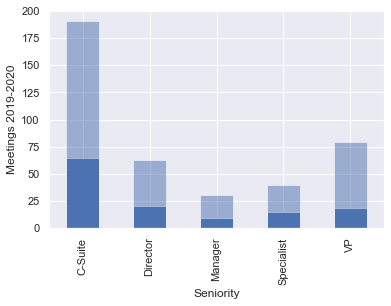

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import panel as pn
import param
import requests



Data1=pd.read_csv(r'C:\Users\Lucas\Desktop\SalesReply-Meeting (4).csv',infer_datetime_format=True,error_bad_lines=False)
head=list(Data1.columns)+['Empty']
Data1=Data1.reset_index()
Data1.columns=head




Data1=Data1[~Data1['Meeting Status'].isin(['Set','Rescheduling','No-Show','Cancelled','DQ'])]
Data1['Meeting Set Date']=pd.to_datetime(Data1['Meeting Set Date'], format=' %m/%d/%Y')
print(Data1.head())

Year_so_far=Data1[('2019-01-01'<=Data1['Meeting Set Date'])&(Data1['Meeting Set Date']<='2020-12-31')].sort_values('Meeting Set Date')

Year_so_far_won=Year_so_far[Year_so_far['Meeting Status'].str.contains('Closed Won')].sort_values('Meeting Set Date',ascending=False)

Year_so_far_lost=Year_so_far[Year_so_far['Meeting Status'].str.contains('Closed Lost')].sort_values('Meeting Set Date',ascending=False)



Title=Year_so_far.groupby('Seniority')['Seniority'].count()
Title_Won=Year_so_far_won.groupby('Seniority')['Seniority'].count()
sns.set(color_codes='True')
figure1=Title_Won.plot.bar()
Title.plot.bar(alpha=.5)
plt.ylabel('Meetings 2019-2020')
plt.show(figure1)

In [60]:
Percentage=Title_Won/Title
Percentage=Percentage.to_frame()
print(Percentage)

            Seniority
Seniority            
C-Suite      0.340314
Director     0.317460
Manager      0.300000
Specialist   0.375000
VP           0.227848


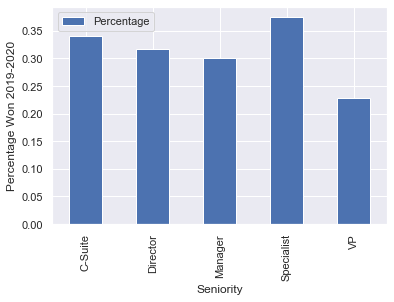

In [28]:
Percentage['Percentage']=Percentage['Seniority']
Percentage=Percentage[['Percentage']].reset_index()
figure2=Percentage.plot.bar(x='Seniority')
plt.ylabel('Percentage Won 2019-2020')
plt.show(figure2)
plt.close()

In [29]:
Meeting_count_by_date=Year_so_far.groupby('Meeting Set Date')['Meeting Set Date'].count().to_frame()
Meeting_count_by_date.columns=['Number of Meetings']
Meeting_count_by_date=Meeting_count_by_date.reset_index()





Meeting_won_by_date=Year_so_far_won.groupby('Meeting Set Date')['Meeting Set Date'].count().to_frame()
Meeting_won_by_date.columns=['Number of Meetings Won']
Meeting_won_by_date=Meeting_won_by_date.reset_index()


Meeting_lost_by_date=Year_so_far_lost.groupby('Meeting Set Date')['Meeting Set Date'].count().to_frame()
Meeting_lost_by_date.columns=['Number of Meetings Lost']
Meeting_lost_by_date=Meeting_lost_by_date.reset_index()

Meetings_Won=pd.merge(Meeting_won_by_date,Meeting_count_by_date,how='outer').fillna(0).sort_values('Meeting Set Date')
Meetings_Won['Percentage Won']=Meetings_Won['Number of Meetings Won']/Meetings_Won['Number of Meetings']

Meetings_Won=Meetings_Won.groupby([Meetings_Won['Meeting Set Date'].dt.year,Meetings_Won['Meeting Set Date'].dt.month]).sum()
Meetings_Won['Percentage Won']=Meetings_Won['Number of Meetings Won']/Meetings_Won['Number of Meetings']


Meetings_Lost=pd.merge(Meeting_lost_by_date,Meeting_count_by_date,how='outer').fillna(0).sort_values('Meeting Set Date')
Meetings_Lost['Percentage Lost']=Meetings_Lost['Number of Meetings Lost']/Meetings_Lost['Number of Meetings']
Meetings_Lost=Meetings_Lost.groupby([Meetings_Lost['Meeting Set Date'].dt.year,Meetings_Lost['Meeting Set Date'].dt.month]).sum()
Meetings_Lost['Percentage Lost']=Meetings_Lost['Number of Meetings Lost']/Meetings_Lost['Number of Meetings']





print('\n')
m=round(Meetings_Won['Percentage Won'].mean(),3)

print(f'Mean Percentage of Meetings Won:{m}')

Meetings_Won.index=Meetings_Won.index.rename(['Meeting Set Year','Meeting Set Month'])
l=list(Meetings_Won.index)
date=[]
for i in range(len(l)):
    time=dt.date(year=l[i][0],month=l[i][1],day=1)
    date.append(time)
    
Meetings_Lost.index=Meetings_Lost.index.rename(['Meeting Set Year','Meeting Set Month'])
l=list(Meetings_Lost.index)
date=[]
for i in range(len(l)):
    time=dt.date(year=l[i][0],month=l[i][1],day=1)
    date.append(time)    



Meetings_Won.reset_index(drop=True)
Meetings_Won.index=date

Meetings_Lost.reset_index(drop=True)
Meetings_Lost.index=date



Mean Percentage of Meetings Won:0.344


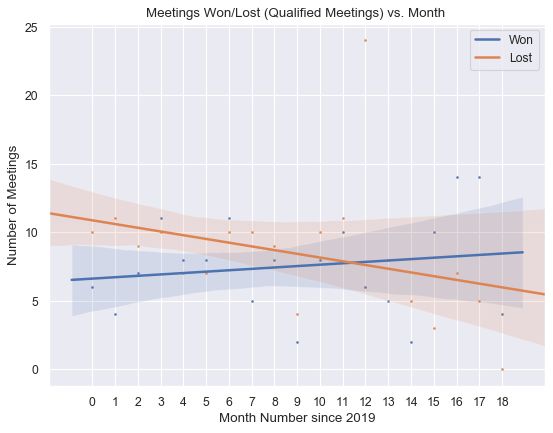

In [44]:
Meetings_Lost=Meetings_Lost.reset_index(drop=True)
Meetings_Won=Meetings_Won.reset_index(drop=True)
Month=list(Meetings_Won.index)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
figure1=sns.regplot(x=Month,y=Meetings_Won['Number of Meetings Won'],scatter_kws={'s':2})
figure2=sns.regplot(x=Month,y=Meetings_Lost['Number of Meetings Lost'],scatter_kws={'s':2})

plt.title("Meetings Won/Lost (Qualified Meetings) vs. Month ")
plt.ylabel('Number of Meetings')
plt.xlabel('Month Number since 2019')
plt.xticks(range(0,19))
plt.legend(['Won','Lost'])
plt.show()

In [45]:
Meeting_Source=Data1.groupby('Meeting Source')['Meeting Source'].count()

In [46]:
Meeting_Source=Meeting_Source.to_frame()

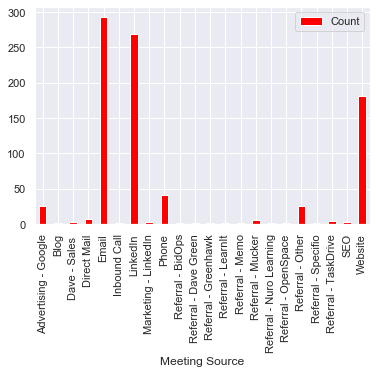

In [47]:
Meeting_Source.columns=['Count']
Meeting_Source.plot.bar(color='red')